In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Smart bike case study.xlsx")


In [ ]:

df['Gender'] = df.groupby(['End Location', 'D.O.W.'])['Gender'].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
df['Dates'] = pd.to_datetime(df['Start date']).dt.date
df['Time'] = pd.to_datetime(df['Start date']).dt.time
df['month'] = pd. DatetimeIndex(df['Dates']). month
df['year'] = pd. DatetimeIndex(df['Dates']). year
df['days'] = pd. DatetimeIndex(df['Dates']). day
df.drop(columns='Start date',axis=1,inplace=True)
#df.drop(columns='Time',axis=1,inplace=True)
df

,Duration,D.O.W.,Hour,End Location,Bike number,Gender,Member type,Dates,Time,month,year,days
0,1310546,3,23,NxT,X00577,Male,Member,2020-06-30,23:14:00,6,2020,30
1,251568,3,23,NxT,X00458,Male,Member,2020-06-30,23:09:00,6,2020,30
2,1306672,3,22,NxT,X01557,Male,Pay per use,2020-06-30,22:55:00,6,2020,30
3,1345033,3,22,NxT,T07816,Male,Pay per use,2020-06-30,22:55:00,6,2020,30
4,1381830,3,22,NxT,X00467,Male,Pay per use,2020-06-30,22:32:00,6,2020,30
...,...,...,...,...,...,...,...,...,...,...,...,...
22263,739719,7,12,NxT,N01175,Male,Member,2020-01-04,12:47:00,1,2020,4
22264,234520,4,14,Guindy,N01255,Male,Member,2020-01-01,14:56:00,1,2020,1
22265,1340515,4,11,Guindy,N01098,Male,Member,2020-01-01,11:39:00,1,2020,1
22266,374969,4,11,Guindy,N01185,Male,Member,2020-01-01,11:00:00,1,2020,1


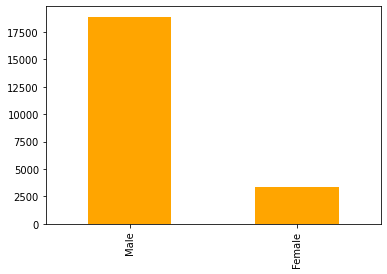

In [ ]:
a=df['Gender'].value_counts()
a.plot(kind='bar',color="orange")


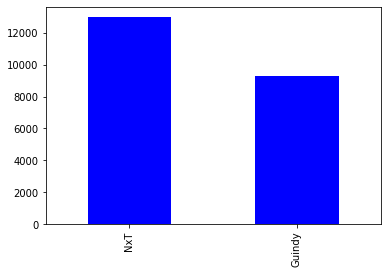

In [ ]:
b=df['End Location'].value_counts()
b.plot(kind='bar',color="blue")
plt.show()

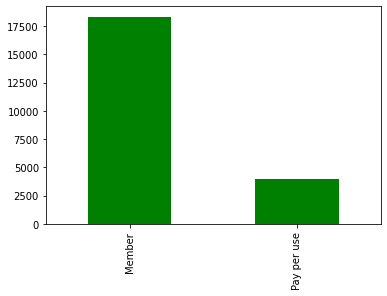

In [ ]:
c=df['Member type'].value_counts()
c.plot(kind='bar',color="green")
plt.show()

In [ ]:
#replacing end location
# df.replace(to_replace ="NxT",value ="0",inplace=True)
# df.replace(to_replace="Guindy",value="1",inplace=True)
# df

In [ ]:
#replace gender
df.replace(to_replace ="Male",value ="0",inplace=True)
#df.replace(to_replace="no data",value="2",inplace=True)
df.replace(to_replace="Female",value="1",inplace=True)
df

,Duration,D.O.W.,Hour,End Location,Bike number,Gender,Member type,Dates,Time,month,year,days
0,1310546,3,23,NxT,X00577,0,Member,2020-06-30,23:14:00,6,2020,30
1,251568,3,23,NxT,X00458,0,Member,2020-06-30,23:09:00,6,2020,30
2,1306672,3,22,NxT,X01557,0,Pay per use,2020-06-30,22:55:00,6,2020,30
3,1345033,3,22,NxT,T07816,0,Pay per use,2020-06-30,22:55:00,6,2020,30
4,1381830,3,22,NxT,X00467,0,Pay per use,2020-06-30,22:32:00,6,2020,30
...,...,...,...,...,...,...,...,...,...,...,...,...
22263,739719,7,12,NxT,N01175,0,Member,2020-01-04,12:47:00,1,2020,4
22264,234520,4,14,Guindy,N01255,0,Member,2020-01-01,14:56:00,1,2020,1
22265,1340515,4,11,Guindy,N01098,0,Member,2020-01-01,11:39:00,1,2020,1
22266,374969,4,11,Guindy,N01185,0,Member,2020-01-01,11:00:00,1,2020,1


In [ ]:
#replace membertype
#df.replace(to_replace="Pay per use",value="1",inplace=True)
#df.drop(columns="Start date",axis=1,inplace=True)
df.drop(columns="Bike number",axis=1,inplace=True)
df.drop(columns="Dates",axis=1,inplace=True)
df.drop(columns="Time",axis=1,inplace=True)
df.drop(columns="year",axis=1,inplace=True)
df["Duration"]=df["Duration"]/86400
df



,Duration,D.O.W.,Hour,End Location,Gender,Member type,month,days
0,15.168356,3,23,NxT,0,Member,6,30
1,2.911667,3,23,NxT,0,Member,6,30
2,15.123519,3,22,NxT,0,Pay per use,6,30
3,15.567512,3,22,NxT,0,Pay per use,6,30
4,15.993403,3,22,NxT,0,Pay per use,6,30
...,...,...,...,...,...,...,...,...
22263,8.561563,7,12,NxT,0,Member,1,4
22264,2.714352,4,14,Guindy,0,Member,1,1
22265,15.515220,4,11,Guindy,0,Member,1,1
22266,4.339919,4,11,Guindy,0,Member,1,1


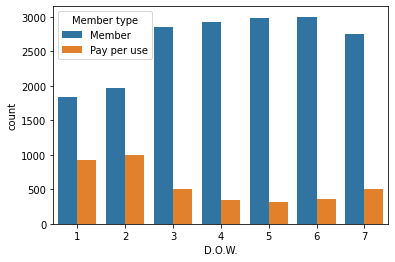

In [ ]:
# day of the week and member type
import seaborn as sns
sns.countplot(data=df,x='D.O.W.',hue='Member type')




1)**use of bi cycle by members increases by 3rd day of the week**


2)**pay per use seems to decrease by 3rd day of the week**

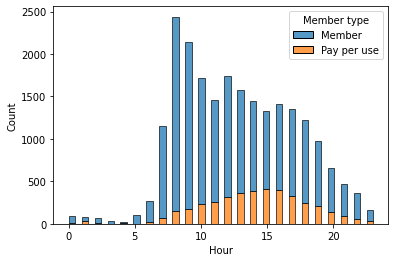

In [ ]:
#comparing hour and member type
sns.histplot(data=df,x="Hour",hue=df['Member type'],multiple='stack')

1)**The neeed of cycles by the members seems to peek between 8 am  to 9 am**

2)**pay per use seems to increase at 3 pm in the evening and decrease at 5 pm in the evening**

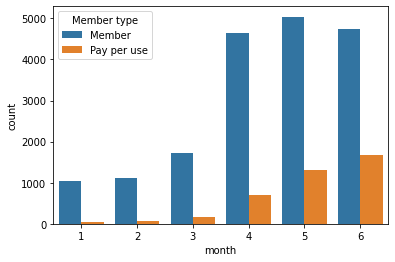

In [ ]:
#comparing month  and membertype
sns.countplot(data=df,x="month",hue=df['Member type'])

**There is a rise in both in pay per use and member in 4th,5th,6th month** 

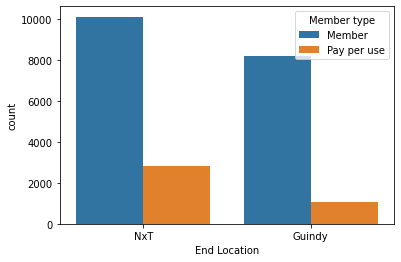

In [ ]:
sns.countplot(data=df,x="End Location",hue=df['Member type'])

**More people tend to go to the end location Nxt then guindy**

In [ ]:
#sns.histplot(data=df,x="days",hue="Member type",multiple='stack',edgecolor='white')

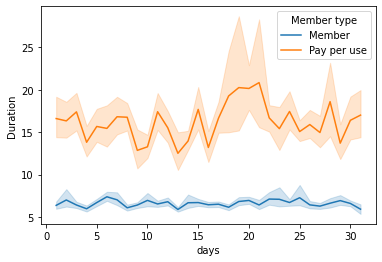

In [ ]:
sns.lineplot(y="Duration",x="days",hue="Member type", data=df)

**Pay per use customers tend to  rent the  cycle for more hours than the members and i t seems to increase during night hours from 8 pm to 11 pm**